In [2]:
import random

def bernoulli(p):
    """
    Generate a Bernoulli random variable with success probability p.
    """
    return int(random.random() < p)


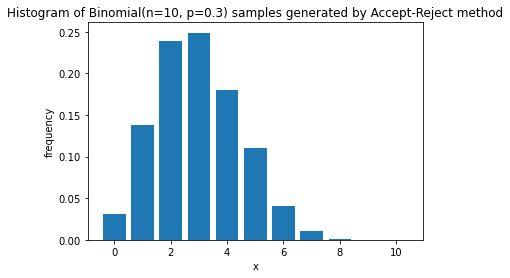

Mean of the samples: 2.9681
Variance of the samples: 2.27108239


In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def binomial_poisson(n, p, num_samples):
    """
    Generate num_samples draws from Binomial(n, p) using a Poisson proposal (λ).
    """
    samples = []
    lam = n * p  # Poisson parameter
    
    while len(samples) < num_samples:
        # generate a Poisson random variable with mean lam
        x = np.random.poisson(lam)
        
        # generate a uniform random variable between 0 and 1
        u = random.uniform(0, 1)
        
        # accept the sample with probability binom(x, n, p) / (poisson(x, lam) / e^lam)
        if u <= math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x)) / (math.exp(-lam) * (lam ** x) / math.factorial(x)):
            samples.append(x)
    
    return samples

# Example usage
n = 10
p = 0.3
num_samples = 10000
samples = binomial_poisson(n, p, num_samples)

# Plot the histogram of the samples
plt.hist(samples, bins=range(n+2), align='left', density=True, rwidth=0.8)
plt.xlabel("x")
plt.ylabel("frequency")
plt.title("Histogram of Binomial(n={}, p={}) samples generated by Accept-Reject method".format(n, p))
plt.show()

# Print the mean and variance of the samples
print("Mean of the samples:", np.mean(samples))
print("Variance of the samples:", np.var(samples))
